In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
%matplotlib inline

file_path = '/export/home/qliu24/qing_voting_data/intermediate/feat_pickle_VGG/'


oo = 'car'
fname = file_path + 'res_info_' + oo + '_train_carVC.pickle'
print('loading object {0}'.format(oo))
with open(fname, 'rb') as fh:
    layer_feature_dist, _, view_point = pickle.load(fh)
    
asp_ratio = [layer_feature_dist[ii].shape[1]/layer_feature_dist[ii].shape[0] for ii in range(len(layer_feature_dist))]
        
N = len(layer_feature_dist)
print('total number of instances {0}'.format(N))


loading object car
total number of instances 1000


In [4]:
magic_thh = 0.81

layer_feature_b = [None for nn in range(N)]
for nn in range(N):
    layer_feature_b[nn] = (layer_feature_dist[nn]<magic_thh).astype(int)
    
view_point = np.array(view_point)
idx_s = np.where(np.logical_and(view_point>=67.5,view_point<=112.5))[0]
# idx_s = np.array(range(N))

max_2 = max([layer_feature_b[nn].shape[2] for nn in idx_s])

max_1 = max([layer_feature_b[nn].shape[1] for nn in idx_s])

max_0 = max([layer_feature_b[nn].shape[0] for nn in idx_s])
print(max_0, max_1, max_2)
print(len(idx_s))

14 54 158
118


In [20]:
def cluster_vc_pos(pos_ls, cluster_num=3):
    km = KMeans(n_clusters=cluster_num, init='k-means++', random_state=99, n_jobs=1)
    assignment = km.fit_predict(pos_ls)
    centers = km.cluster_centers_
    return assignment, centers

def bgm_vc_pos(pos_ls, cluster_num=3):
    bgm = BayesianGaussianMixture(n_components=cluster_num, covariance_type='diag', \
                                  weight_concentration_prior_type="dirichlet_distribution", \
                                  n_init=1, max_iter=1500)
    
    bgm.fit(pos_ls)
    assignment = bgm.predict(pos_ls)
    return bgm


def gm_vc_pos(pos_ls, cluster_num=3):
    bgm = GaussianMixture(n_components=cluster_num, covariance_type='diag', \
                                  n_init=10, max_iter=1500)
    
    bgm.fit(pos_ls)
    assignment = bgm.predict(pos_ls)
    return bgm

def plot_ellipses(ax, weights, means, covars):
    for n in range(means.shape[0]):
        cov = np.diag(covars[n])
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        unit_eig_vec = eig_vecs[0] / np.linalg.norm(eig_vecs[0])
        angle = np.arctan2(unit_eig_vec[1], unit_eig_vec[0])
        # Ellipse needs degrees
        angle = 180 * angle / np.pi
        # eigenvector normalization
        eig_vals = 2 * np.sqrt(2) * np.sqrt(eig_vals)
        ell = mpl.patches.Ellipse(means[n], eig_vals[0], eig_vals[1],
                                  180 + angle)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(weights[n])
        ell.set_facecolor('#56B4E9')
        ax.add_artist(ell)

VC idx: 8
[ 0.08871573  0.34391708  0.12335731  0.1337239   0.29972483  0.01056115]
[ 0.33839296  0.26987262  0.22195777  0.13926005  0.03051658]
[ 0.34371557  0.45331233  0.07037664  0.13259546]
[ 0.05643348  0.47150977  0.47205675]
[ 0.51527475  0.48472525]
final K: 2


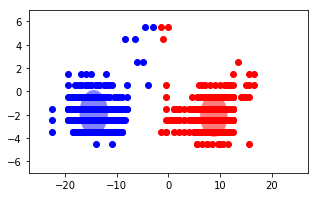

VC idx: 42
[ 0.34879679  0.18628472  0.12135991  0.06741303  0.06472176  0.2114238 ]
[ 0.24310219  0.16439491  0.34306348  0.16291249  0.08652693]
[ 0.08159921  0.16540581  0.34795266  0.40504231]
[ 0.42520778  0.16970172  0.4050905 ]
final K: 3


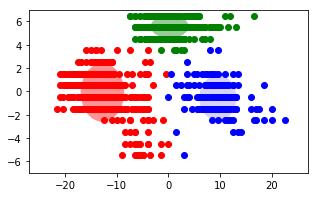

VC idx: 5
[ 0.03487958  0.34790022  0.20562404  0.14976695  0.23628062  0.02554859]
[ 0.30649723  0.35184244  0.16876926  0.14582448  0.02706659]
[ 0.41209021  0.35272678  0.09050876  0.14467425]
[ 0.42219309  0.49721391  0.08059299]
[ 0.50166049  0.49833951]
final K: 2


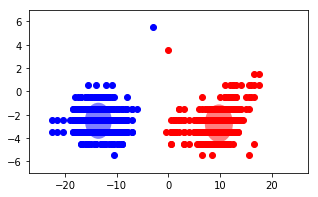

VC idx: 31
[ 0.16180647  0.28416454  0.14693249  0.08145079  0.24580501  0.07984071]
[ 0.20296548  0.07420509  0.25503576  0.08649849  0.38129518]
[ 0.36104418  0.26097866  0.16450924  0.21346792]
final K: 4


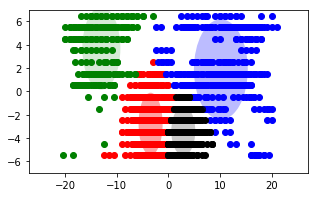

VC idx: 0
[ 0.21729959  0.24266898  0.02921484  0.28574164  0.21009417  0.01498078]
[ 0.19198931  0.24398832  0.2834038   0.03925451  0.24136406]
[ 0.31785508  0.41255344  0.2097161   0.05987538]
[ 0.52760257  0.41352537  0.05887206]
[ 0.52856231  0.47143769]
final K: 2


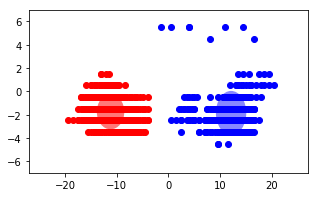

VC idx: 13
[ 0.08167485  0.33388588  0.11229936  0.01971988  0.16992903  0.28249099]
[ 0.36297243  0.33049047  0.01972012  0.17332548  0.1134915 ]
[ 0.50381618  0.36056883  0.01972011  0.11589487]
[ 0.06504856  0.43526635  0.49968509]
[ 0.50441246  0.49558754]
final K: 2


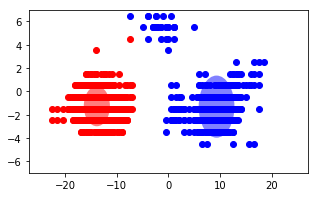

VC idx: 33
[ 0.0832479   0.35715989  0.05795129  0.16723879  0.20677477  0.12762736]
[ 0.37354851  0.05973524  0.09797947  0.22028477  0.24845201]
[ 0.38558164  0.27898941  0.05070459  0.28472436]
[ 0.65465581  0.05052686  0.29481733]
[ 0.64180084  0.35819916]
final K: 2


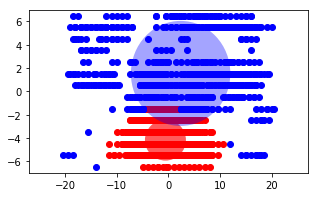

VC idx: 2
[ 0.25014839  0.21708543  0.17990516  0.04680573  0.13745629  0.168599  ]
[ 0.20110329  0.33375186  0.04791175  0.22783759  0.18939551]
[ 0.18655867  0.41827766  0.33707072  0.05809295]
[ 0.52340348  0.41889396  0.05770256]
[ 0.52813743  0.47186257]
final K: 2


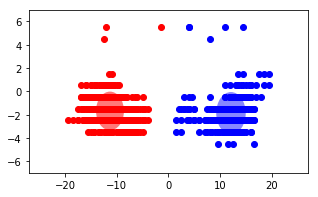

VC idx: 1
[ 0.16811139  0.25464825  0.05258037  0.25829881  0.24127741  0.02508377]
[ 0.03953231  0.34252833  0.17037888  0.16424639  0.28331409]
[ 0.51290764  0.28078787  0.1665362   0.03976828]
[ 0.39702476  0.51251521  0.09046003]
[ 0.51297403  0.48702597]
final K: 2


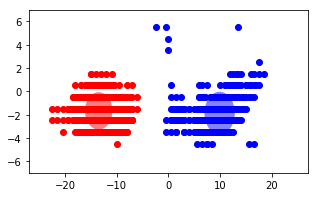

VC idx: 26
[ 0.15892565  0.23375104  0.11089272  0.22710168  0.07419172  0.1951372 ]
[ 0.0735652   0.20188906  0.25647785  0.13118789  0.33688   ]
[ 0.47195957  0.1700641   0.28348056  0.07449577]
[ 0.67458663  0.2544515   0.07096188]
[ 0.61043436  0.38956564]
final K: 2


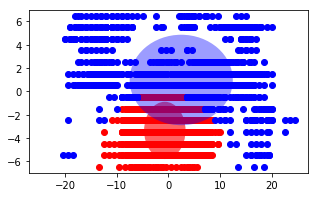

In [26]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (5.0, 3.0)
# vc_idx = np.argsort(vc_count)[-3]
for vc_idx in np.argsort(vc_count)[-10:]:
    print('VC idx: {0}'.format(vc_idx))
    vc_p = []
    for nn in idx_s:
        vc_l = layer_feature_b[nn][:,:,vc_idx]
        rnum, colnum = vc_l.shape
        row_i, col_i = np.where(vc_l==1)
        for pp in range(len(row_i)):
            vc_p.append((col_i[pp]-(colnum-1)/2, (rnum-1)/2-row_i[pp]))

    vc_p=np.array(vc_p)
    K=6
    gm = gm_vc_pos(vc_p, K)
    while True:
        print(gm.weights_)
        if np.any(gm.weights_<0.1):
            K -= 1
            gm = gm_vc_pos(vc_p, K)
        else:
            break

    print('final K: {0}'.format(K))

    ass = gm.predict(vc_p)
    cl = ['r','b','g','k','purple','orange']
    f,ax = plt.subplots()
    for kk in range(K):
        ax.scatter(vc_p[ass==kk,0], vc_p[ass==kk,1], color=cl[kk])
        ci = gm.means_[kk]
        covi = gm.covariances_[kk]
        weighti = gm.weights_[kk]
        ell = mpl.patches.Ellipse(ci, np.sqrt(covi[0])*2, np.sqrt(covi[1])*3)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(weighti)
        ell.set_facecolor(color=cl[kk])
        ax.add_artist(ell)

    # plot_ellipses(ax, bgm.weights_, bgm.means_, bgm.covariances_)

    plt.xlim([-27,27])
    plt.ylim([-7,7])
    plt.show()

In [6]:
bgm.covariances_

array([[ 68.30496325,   6.24626507],
       [ 22.52934555,   2.06909118]])

(14, 54)


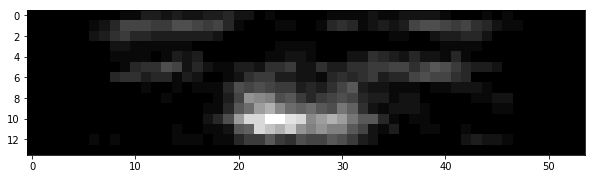

In [23]:
# heatmap of vc firing in all examples
vc_idx = np.argsort(vc_count)[-7]
vc_p = np.zeros((max_0,max_1))
for nn in idx_s:
    vc_l = layer_feature_b[nn][:,:,vc_idx]
    hh, ww = vc_l.shape
    diff_w1 = int((max_1-ww)/2)
    diff_w2 = int(max_1-ww-diff_w1)
    assert(max_1 == diff_w1+diff_w2+ww)
    
    diff_h1 = int((max_0-hh)/2)
    diff_h2 = int(max_0-hh-diff_h1)
    assert(max_0 == diff_h1+diff_h2+hh)
    
    padded = np.pad(vc_l, ((diff_h1, diff_h2),(diff_w1, diff_w2)), 'constant', constant_values=0)
    vc_p += padded

print(vc_p.shape)

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
fig, ax = plt.subplots()
# ax.imshow(mean_acr_vc.T)
ax.imshow(vc_p)
plt.show()

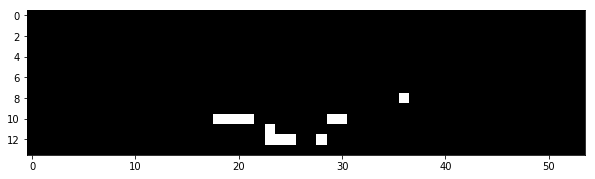

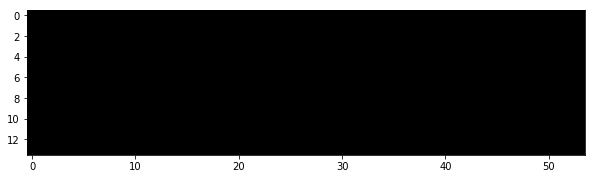

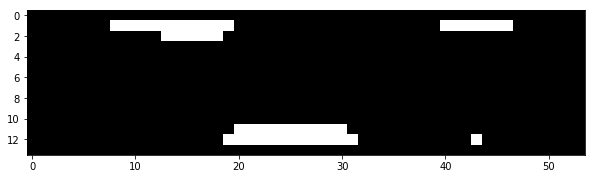

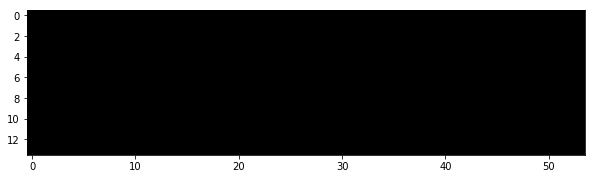

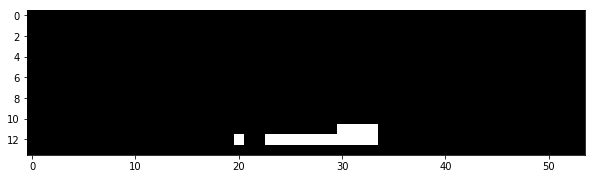

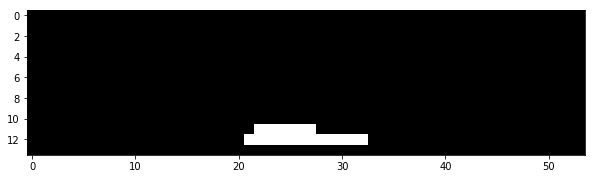

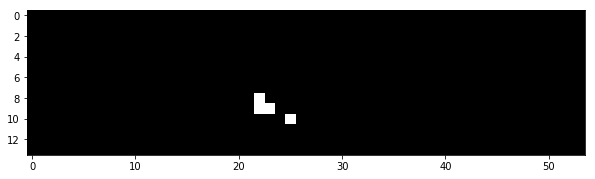

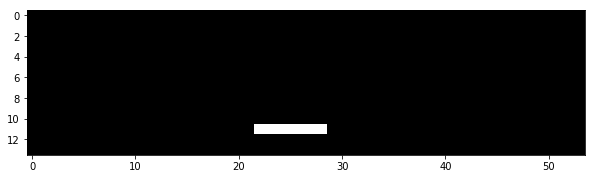

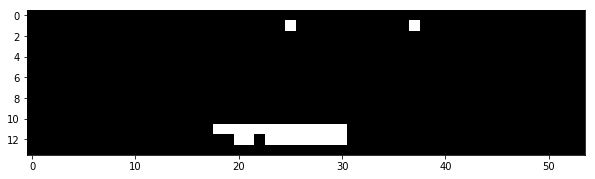

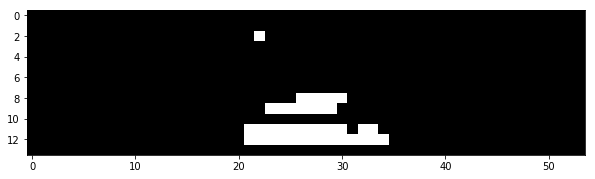

In [21]:
# heatmap of vc firing in specific example
vc_idx =  np.argsort(vc_count)[-4]
for nn in idx_s[0:10]:
    vc_p = np.zeros((max_0,max_1))
    
    vc_l = layer_feature_b[nn][:,:,vc_idx]
    hh, ww = vc_l.shape
    diff_w1 = int((max_1-ww)/2)
    diff_w2 = int(max_1-ww-diff_w1)
    assert(max_1 == diff_w1+diff_w2+ww)
    
    diff_h1 = int((max_0-hh)/2)
    diff_h2 = int(max_0-hh-diff_h1)
    assert(max_0 == diff_h1+diff_h2+hh)
    
    padded = np.pad(vc_l, ((diff_h1, diff_h2),(diff_w1, diff_w2)), 'constant', constant_values=0)
    vc_p += padded
    plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'
    fig, ax = plt.subplots()
    # ax.imshow(mean_acr_vc.T)
    ax.imshow(vc_p)
    plt.show()

(1000, 158)
(158,)


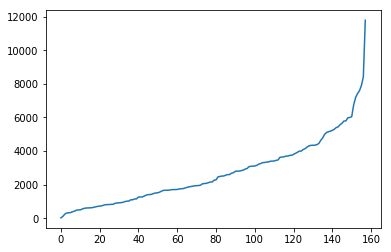

[155 157 131 129 134 110 152 156 139  83 150 117 141 126  69 123 144 132
 130 108  47 146 151 147  50  52 140 138 121  28 105 148  38 128 122 112
 125 107 111  17  86  53 113 118  92 124  63 115  89 120 136 102  73  35
 116  74 135 137  96  30  25  11  94  68 133  22  80  41 145  64 103  45
  43  29  60  99 149 154  91 101 114  59  98  67  56 104 100   3  78  10
  84 119  66  32  75  85  20  27  48  16  37  77 106  49 153  97  34 142
  61  62  87  72  55 127  51  54 143  93  58  88  19  18  71  57  15   4
  79  23 109  90  21   6  46  44  24  95  40  36  12  39  14  82  81  65
  70   9  76   7   8  42   5  31   0  13  33   2   1  26]


In [4]:
# stats of each VC's firing counts (of pixels) in all samples
vc_count = np.array([np.sum(np.sum(layer_feature_b[nn], axis=0),axis=0) for nn in range(N)])
print(vc_count.shape)
vc_count = np.sum(vc_count, axis=0)
print(vc_count.shape)
plt.plot(np.sort(vc_count))
plt.show()
print(np.argsort(vc_count))

(118, 158)
(158,)


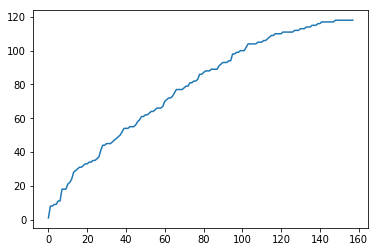

[155 157  17  38 108 110  30  11 139 131 134 152 156 136 122 144 128  53
 124 130 140  69 121 105 132 129 123  50  59 150 145 147 146  28 138 112
  83 117  52 115 126  86  68 141  47 120 151  89 148 111 114  94 104  96
  25 113 125 118  81  73  45  48  27  80 116 102  64  92  84 149   3  63
 133 137  79  22  99  98  43  35 135  34 119  60  32  29 107 103  91 101
 142 106 153 154  55  61  10 109  67  93  72  51  31  20  87  21  85  49
  40  56  88  41  36  90  37  18 100  74  75  16  66  70  33  23  77  44
  97  65  62  57  71  76 143  78  58  54  95  46  39  26 127   6   9  14
  24  42  19   0  15  13  12   8   7  82   5   4   2   1]


In [6]:
# stats of each VC's firing counts (of examples)
vc_count = np.array([np.sum(np.sum(layer_feature_b[nn], axis=0),axis=0) for nn in idx_s])
vc_count = (vc_count>0).astype(int)
print(vc_count.shape)
vc_count = np.sum(vc_count, axis=0)
print(vc_count.shape)
plt.plot(np.sort(vc_count))
plt.show()
print(np.argsort(vc_count))